In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("data\predictive_maintenance.csv")

<>:1: SyntaxWarning: invalid escape sequence '\p'
<>:1: SyntaxWarning: invalid escape sequence '\p'
C:\Users\Admin\AppData\Local\Temp\ipykernel_15176\2656768912.py:1: SyntaxWarning: invalid escape sequence '\p'
  df = pd.read_csv("data\predictive_maintenance.csv")


In [4]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
0,1,M14860,M,298.1,308.6,1551,42.8,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 703.3+ KB


In [6]:
df.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
dtype: int64

No missing values

In [7]:
df.duplicated().sum()

np.int64(0)

No duplicated values

In [8]:
df.nunique()

UDI                        10000
Product ID                 10000
Type                           3
Air temperature [K]           93
Process temperature [K]       82
Rotational speed [rpm]       941
Torque [Nm]                  577
Tool wear [min]              246
Target                         2
dtype: int64

In [9]:
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [10]:
df['Target'].value_counts(normalize= True)

Target
0    0.9661
1    0.0339
Name: proportion, dtype: float64

Major imbalance in the data which will need to be dealt with

In [11]:
cat_cols = df.select_dtypes(object).columns
num_cols = df.select_dtypes('number')
num_names = num_cols.columns
num_names.drop(['UDI',"Target"])


Index(['Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]'],
      dtype='object')

In [12]:
print(cat_cols)
print(num_names)

Index(['Product ID', 'Type'], dtype='object')
Index(['UDI', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Target'],
      dtype='object')


In [114]:
for i in cat_cols:
    print("**************")
    print(df[i].value_counts())
    

**************
Product ID
L57163    1
M24842    1
L57161    1
L57160    1
L57159    1
         ..
L47184    1
L47183    1
L47182    1
L47181    1
M14860    1
Name: count, Length: 10000, dtype: int64
**************
Type
L    6000
M    2997
H    1003
Name: count, dtype: int64


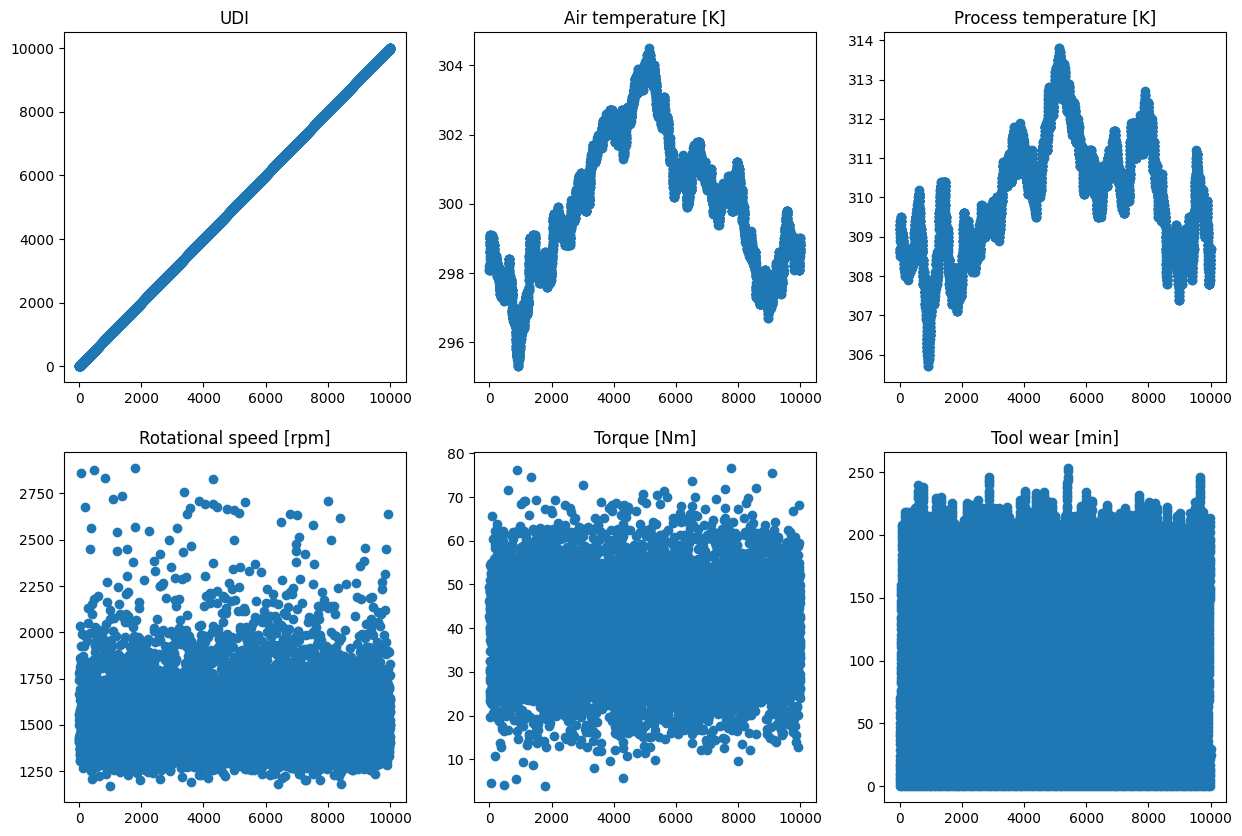

In [115]:
row_num = 2
cols = 3

col_index= 0

fig, ax = plt.subplots(nrows = row_num, ncols = cols, figsize = [15,10])

for i in range(row_num):
    for j in range(cols):
        if col_index < 6:
            ax[i][j].scatter(y = df[num_names[col_index]], x = num_cols.index)
            ax[i][j].set_title(num_names[col_index])
            col_index += 1

- no noticeable outliers in the data
- Data will need standardization (min max scaler)
- UDI can be dropped

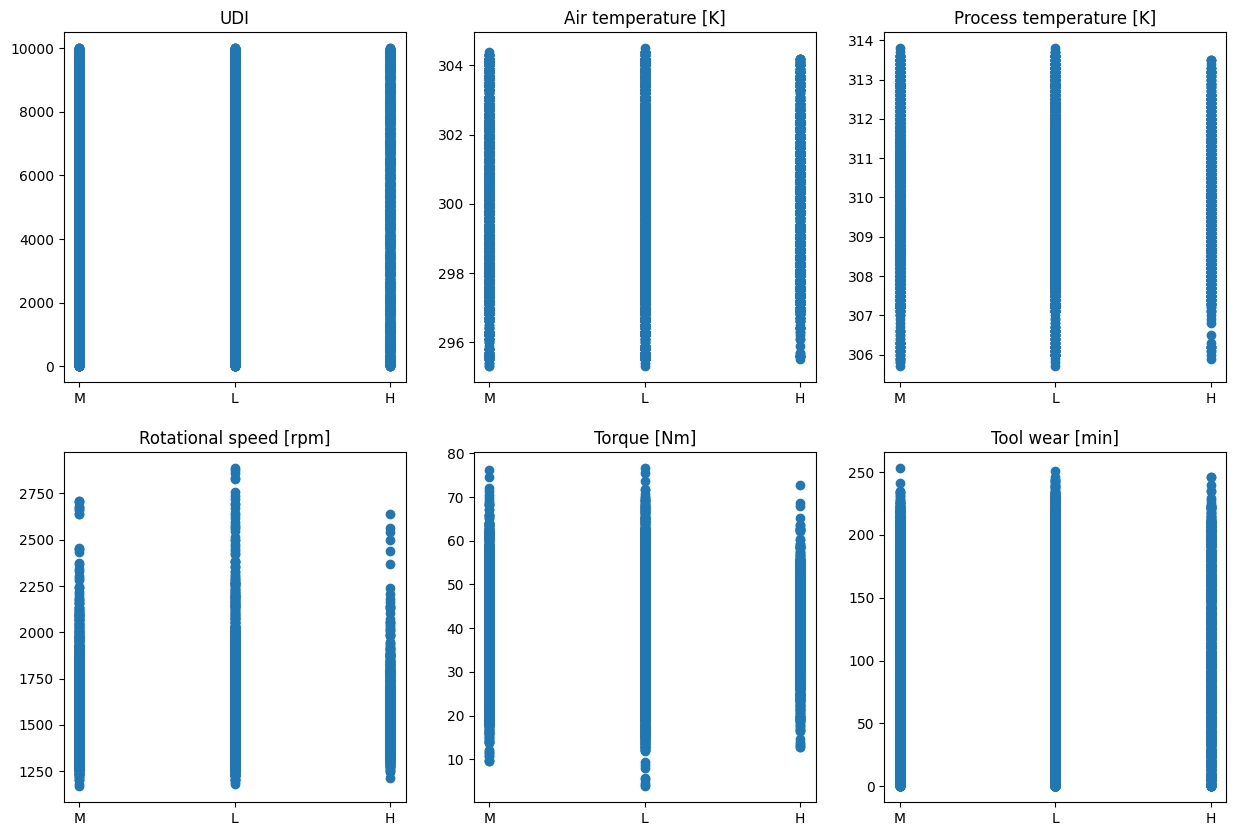

In [116]:
row_num = 2
cols = 3

col_index= 0

fig, ax = plt.subplots(nrows = row_num, ncols = cols, figsize = [15,10])

for i in range(row_num):
    for j in range(cols):
        if col_index < 6:
            ax[i][j].scatter(y = df[num_names[col_index]], x = df['Type'])
            ax[i][j].set_title(num_names[col_index])
            col_index += 1

<Axes: >

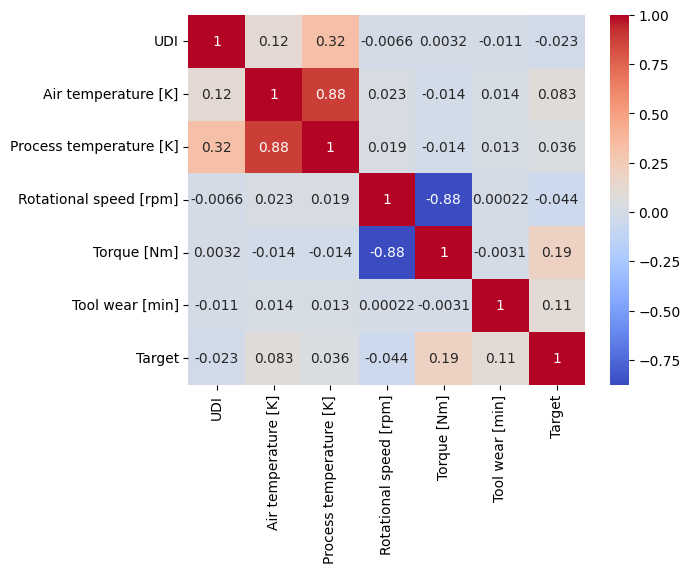

In [117]:
corr = df[num_names].corr()
sns.heatmap(corr, cmap= 'coolwarm', annot= True)

# Preprocessing

In [118]:
from sklearn.preprocessing import OneHotEncoder

In [119]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
0,1,M14860,M,298.1,308.6,1551,42.8,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0


In [120]:
df.drop(['UDI','Product ID'],axis = 1, inplace= True)

In [121]:
df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
0,M,298.1,308.6,1551,42.8,0,0
1,L,298.2,308.7,1408,46.3,3,0
2,L,298.1,308.5,1498,49.4,5,0
3,L,298.2,308.6,1433,39.5,7,0
4,L,298.2,308.7,1408,40.0,9,0


Type needs encoding

In [122]:
ohe = OneHotEncoder(sparse_output= False, )
enc_col = pd.DataFrame(ohe.fit_transform(df[['Type']]))
enc_col.columns = ohe.get_feature_names_out()


In [ ]:
df = pd.concat([df,enc_col], axis = 1)
df.drop('Type', axis =1, inplace= True)

In [125]:
df.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Type_H,Type_L,Type_M
0,298.1,308.6,1551,42.8,0,0,0.0,0.0,1.0
1,298.2,308.7,1408,46.3,3,0,0.0,1.0,0.0
2,298.1,308.5,1498,49.4,5,0,0.0,1.0,0.0
3,298.2,308.6,1433,39.5,7,0,0.0,1.0,0.0
4,298.2,308.7,1408,40.0,9,0,0.0,1.0,0.0


In [129]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaled_df = pd.DataFrame(scaler.fit_transform(df))
scaled_df.columns = scaler.get_feature_names_out()

In [130]:
scaled_df.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Type_H,Type_L,Type_M
0,0.304348,0.358025,0.222934,0.535714,0.000000,0.0,0.0,0.0,1.0
1,0.315217,0.370370,0.139697,0.583791,0.011858,0.0,0.0,1.0,0.0
2,0.304348,0.345679,0.192084,0.626374,0.019763,0.0,0.0,1.0,0.0
3,0.315217,0.358025,0.154249,0.490385,0.027668,0.0,0.0,1.0,0.0
4,0.315217,0.370370,0.139697,0.497253,0.035573,0.0,0.0,1.0,0.0


In [ ]:
x = scaled_df.drop()

In [131]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
x_train, x_test, y_train, y_test = train_test_split()